<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
from dask.distributed import Client, LocalCluster

client = LocalCluster(n_workers=2)
client

/opt/anaconda/lib/python3.7/site-packages/distributed/node.py:244: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45149 instead
  http_address["port"], self.http_server.port


In [3]:
import datetime as dt
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

xr.set_options(keep_attrs = True)

In [4]:
from data_analysis.basic_calcs import *

In [5]:
ds = get_tamsat_ds("precip")

/opt/anaconda/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/opt/anaconda/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/opt/anaconda/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'spacing'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


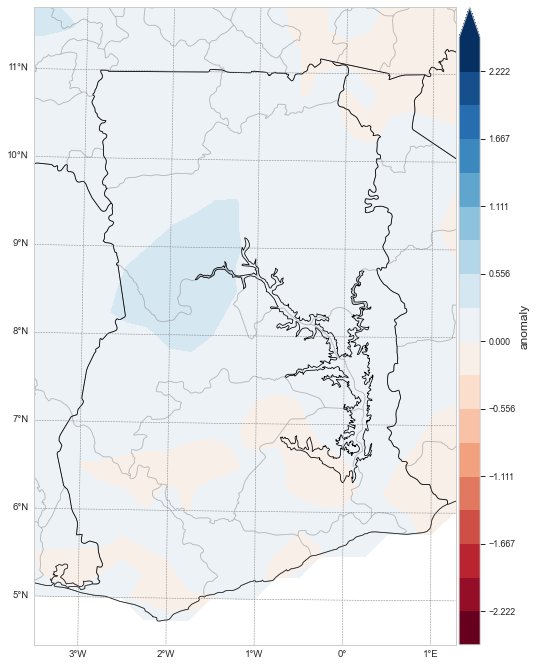

In [7]:
fig = plot_z_score(calculate_z_score(ds, curr_month_number=4), contour=True)

/opt/anaconda/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'spacing'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


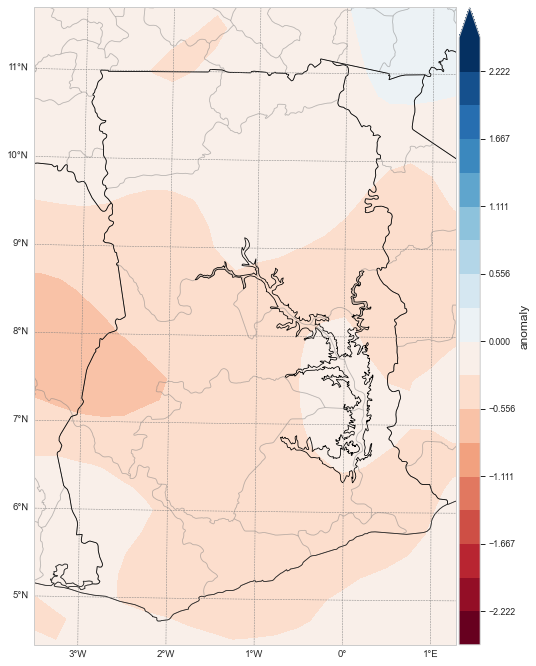

In [10]:
ds = get_era5_ds('ssrd')
fig = plot_z_score(calculate_z_score(ds, curr_month_number=4),contour=True)

In [ ]:
ds = get_modis_ds()
fig=plot_z_score(calculate_z_score(ds, curr_month_number=4), contour=False)

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
